In [29]:
%matplotlib inline

import feather
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import pickle



with open ('/home/aris/Desktop/Aswathy/Features_All.pickle', 'rb') as f:
    Features_all = pickle.load(f)
    
#print 'The last year dataframe has '+ str(len(image_survey_metrics['user_id'].unique()))+' users.'
print Features_all.shape
Features_all.head()

(108, 906)


,user_id,PERMA,fear,amazement,sadness,joy,surprise,interest,terror,anger,...,face_smile_TRUE,eyeglasses_FALSE,eyeglasses_TRUE,CALM,HAPPY,SURPRISED,SAD,ANGRY,CONFUSED,DISGUSTED
0,53918317,5.095238,0.068814,0.430655,0.152746,0.197468,0.010509,0.038049,0.040983,0.017461,...,0.615385,0.833333,0.166667,0.121951,0.268293,0.219512,0.195122,0.121951,0.048780,0.024390
1,11520833,6.809524,0.016836,0.549315,0.093839,0.188605,0.000000,0.080893,0.038940,0.014118,...,0.461538,0.615385,0.384615,0.102564,0.230769,0.153846,0.205128,0.128205,0.128205,0.051282
2,2143580844,5.619048,0.000000,0.000000,0.453759,0.000000,0.150047,0.285467,0.000000,0.110727,...,0.000000,1.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000
3,287562303,7.142857,0.000000,0.547513,0.066509,0.240479,0.004924,0.075634,0.015454,0.003341,...,0.742857,0.675000,0.325000,0.116279,0.224806,0.093023,0.162791,0.155039,0.147287,0.100775
4,1619510,4.000000,0.014664,0.520738,0.134709,0.177994,0.007863,0.096523,0.007677,0.029018,...,0.818182,0.320000,0.680000,0.171233,0.267123,0.082192,0.164384,0.095890,0.198630,0.020548


In [30]:
Features_all.set_index('user_id',inplace=True)

In [31]:
Features_all.head(2)

,PERMA,fear,amazement,sadness,joy,surprise,interest,terror,anger,trust,...,face_smile_TRUE,eyeglasses_FALSE,eyeglasses_TRUE,CALM,HAPPY,SURPRISED,SAD,ANGRY,CONFUSED,DISGUSTED
user_id,,,,,,,,,,,,,,,,,,,,,
53918317,5.095238,0.068814,0.430655,0.152746,0.197468,0.010509,0.038049,0.040983,0.017461,0.01557,...,0.615385,0.833333,0.166667,0.121951,0.268293,0.219512,0.195122,0.121951,0.048780,0.024390
11520833,6.809524,0.016836,0.549315,0.093839,0.188605,0.000000,0.080893,0.038940,0.014118,0.00000,...,0.461538,0.615385,0.384615,0.102564,0.230769,0.153846,0.205128,0.128205,0.128205,0.051282


In [32]:
Features_all.rename(columns={'Military Uniform':'Military_Uniform','Business Card':'Business_Card','Cash Machine':'Cash_Machine'},inplace=True)

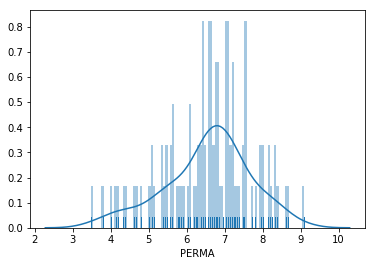

In [33]:
sns.distplot(Features_all.PERMA, rug=True,bins=100)

# Correlation

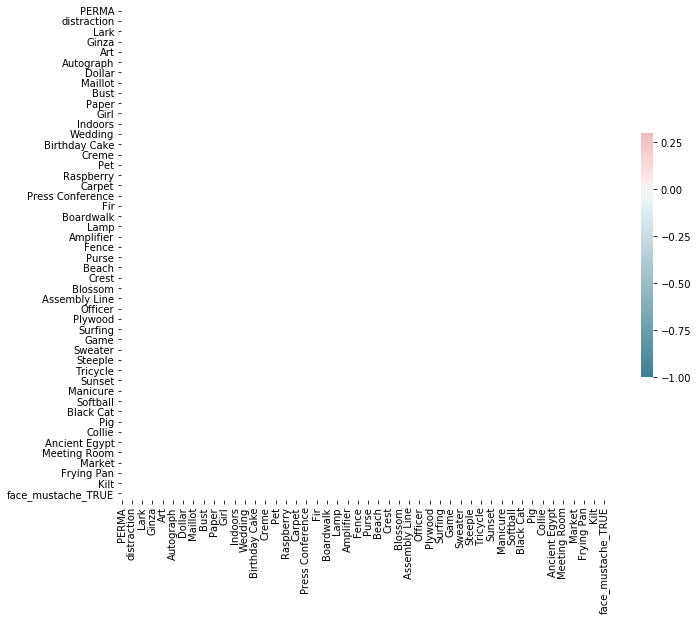

In [34]:
#correlation matrix
correlation_matrix = Features_all.corr()

#PLOT THE CORRELATIONS TO Seaborn

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure|
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
#correlation matrix
correlation_matrix = Features_all.corr()
correlation_matrix

,PERMA,fear,amazement,sadness,joy,surprise,interest,terror,anger,trust,...,face_smile_TRUE,eyeglasses_FALSE,eyeglasses_TRUE,CALM,HAPPY,SURPRISED,SAD,ANGRY,CONFUSED,DISGUSTED
PERMA,1.000000,-0.200601,0.016053,-0.084031,0.144409,-0.102281,-0.009896,-0.063755,-0.156917,-0.006843,...,0.076846,0.104745,-0.104745,-0.136249,-0.055100,-0.078652,0.057134,0.128002,0.008381,0.091334
fear,-0.200601,1.000000,0.007787,-0.109196,-0.223717,0.254443,0.024769,0.160005,0.249846,0.174274,...,-0.089071,-0.241142,0.241142,-0.035945,-0.021150,0.192487,0.095399,-0.132722,-0.164303,0.080858
amazement,0.016053,0.007787,1.000000,-0.408003,-0.425723,-0.301367,-0.411345,-0.239523,-0.374454,-0.048877,...,0.220206,-0.073018,0.073018,-0.072528,0.275610,0.022772,0.004726,-0.168256,-0.034054,0.046123
sadness,-0.084031,-0.109196,-0.408003,1.000000,-0.327507,0.205287,0.109222,-0.044696,0.254386,-0.147445,...,-0.059078,0.141778,-0.141778,0.041104,-0.041785,-0.066035,-0.113978,0.148687,-0.013913,0.044909
joy,0.144409,-0.223717,-0.425723,-0.327507,1.000000,-0.243069,-0.211771,-0.057104,-0.294991,-0.086380,...,0.090375,0.135089,-0.135089,0.001777,-0.134203,0.026503,-0.063559,0.135379,0.010732,-0.019949
surprise,-0.102281,0.254443,-0.301367,0.205287,-0.243069,1.000000,0.342163,0.020061,0.396754,-0.010178,...,-0.251868,0.099071,-0.099071,0.281913,-0.267017,-0.138317,0.173487,-0.189673,0.133198,-0.020518
interest,-0.009896,0.024769,-0.411345,0.109222,-0.211771,0.342163,1.000000,0.082308,0.274852,0.039652,...,-0.361719,-0.058550,0.058550,0.125141,-0.303680,-0.175966,0.308154,-0.171656,0.249231,-0.078610
terror,-0.063755,0.160005,-0.239523,-0.044696,-0.057104,0.020061,0.082308,1.000000,0.188437,0.195435,...,-0.234437,0.008650,-0.008650,0.006058,0.034015,-0.070825,0.128166,0.038245,-0.105061,-0.028122
anger,-0.156917,0.249846,-0.374454,0.254386,-0.294991,0.396754,0.274852,0.188437,1.000000,0.073190,...,-0.233407,-0.040282,0.040282,-0.062436,-0.087315,0.164668,-0.009535,0.112760,-0.122648,-0.048057
trust,-0.006843,0.174274,-0.048877,-0.147445,-0.086380,-0.010178,0.039652,0.195435,0.073190,1.000000,...,-0.098866,-0.267640,0.267640,-0.094666,-0.031766,0.007530,0.057979,-0.062426,0.002104,0.170590


# Regression

In [36]:
def subtrack_features(main_list, subtr_features):
    
    new = [item for item in main_list if item not in subtr_features]
    
    return new

def prepare_set_statmodel(features):
    
    return 'PERMA~'+ '+'.join(features)


def regression_stats(formula,data):
    # create a fitted model with all three features
    lm = smf.ols(formula= formula, data=data).fit()
    print lm.params
    return lm
    

In [16]:
features = list(correlation_matrix)
#features.remove('user_id')
features.remove('PERMA')
features

[u'fear',
 u'amazement',
 u'sadness',
 u'joy',
 u'surprise',
 u'interest',
 u'terror',
 u'anger',
 u'trust',
 u'ecstasy',
 u'serenity',
 u'pensiveness',
 u'grief',
 u'acceptance',
 u'rage',
 u'disgust',
 u'boredom',
 u'annoyance',
 u'distraction',
 u'anticipation',
 'anp_sentiment',
 'Inkwell',
 'Nashville',
 'Willow',
 'Slumber',
 'Mayfair',
 'Crema',
 'Hudson',
 'Ashby',
 'Moon',
 'Sierra',
 'Hefe',
 'Walden',
 'Brannan',
 'Earlybird',
 'Charmes',
 'Reyes',
 'Lark',
 'Valencia',
 'Aden',
 'Ludwig',
 'Stinson',
 'Maven',
 'Gingham',
 'Juno',
 'Normal',
 '1977',
 'Lo-fi',
 'Rise',
 'Sutro',
 'Skyline',
 'Brooklyn',
 'X-Pro II',
 'Clarendon',
 'Perpetua',
 'Amaro',
 'Ginza',
 'Dogpatch',
 'Vesper',
 'Helena',
 'data_memorability',
 u'user_followed_by',
 u'user_follows',
 u'user_posted_photos',
 u'Human',
 u'People',
 u'Person',
 u'Bench',
 u'Portrait',
 u'Selfie',
 u'Teddy Bear',
 u'Toy',
 u'Mascot',
 u'Cave',
 u'Bowl',
 u'Art',
 u'Sculpture',
 u'Statue',
 u'Couch',
 u'Furniture',
 u'St

In [37]:
features = ['fear','pensiveness','user_posted_photos','Autograph','Signature','Hair',\
 'Business_Card','Haircut','Braid','Wig','Performer','Machine','Atm','Cash_Machine',\
 'Military_Uniform','Apron','Mime','Leaf','Moth','Shelf','Armor','Collie','Husky',\
            u'like_count',u'imagecount',u'user_posted_photos',u'comment_count']


#[u'like_count',u'imagecount',u'user_posted_photos',u'comment_count']

In [38]:
a = Features_all[features]
a.head(2)

KeyError: "[u'like_count' u'imagecount' u'comment_count'] not in index"

In [19]:



lm1_model = regression_stats(prepare_set_statmodel(features),Features_all)
lm1_model.summary() 

Intercept               7.076587
fear                  -13.013220
pensiveness           -51.516078
user_posted_photos     -0.000190
Autograph              -7.618607
Signature              -7.618607
Hair                   -0.806146
Business_Card        -655.632135
Haircut              -188.813015
Braid                  65.960663
Wig                  -593.013094
Performer             -22.092804
Machine              -148.750645
Atm                    88.693872
Cash_Machine           88.693872
Military_Uniform     -170.873203
Apron                 225.398788
Mime                 -317.190289
Leaf                  -99.737210
Moth                  -99.737210
Shelf                 -99.737210
Armor                 -99.737210
Collie                -39.878356
Husky                -176.085100
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     4.498
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           8.38e-07
Time:                        13:18:30   Log-Likelihood:                -130.76
No. Observations:                 108   AIC:                             299.5
Df Residuals:                      89   BIC:                             350.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.0766      0.138     51.115      0.000       6.802       7.352
fear                 -13.0132      6.552     -1.986      0.050     -26.032       0.006
pensiveness          -51.5161     40.132     -1.284      0.203    -131.258      28.226
user_posted_photos    -0.0002      0.000     -0.874      0.384      -0.001       0.000
Autograph             -7.6186     17.699     -0.430      0.668     -42.787      27.549
Signature             -7.6186     17.699     -0.430      0.668     -42.787      27.549
Hair                  -0.8061     15.190     -0.053      0.958     -30.989      29.377
Business_Card       -655.6321   1442.932     -0.454      0.651   -3522.708    2211.444
Haircut             -188.8130     87.800     -2.150      0.034    -363.269     -14.357
Braid                 65.9607    212.227      0.311      0.757    -355.730     487.651
Wig                 -593.0131   1485.826     -0.399      0.691   -3545.318    2359.291
Performer            -22.0928     11.392     -1.939      0.056     -44.729       0.543
Machine             -148.7506    129.972     -1.144      0.255    -407.003     109.501
Atm                   88.6939    747.094      0.119      0.906   -1395.766    1573.153
Cash_Machine          88.6939    747.094      0.119      0.906   -1395.766    1573.153
Military_Uniform    -170.8732     59.539     -2.870      0.005    -289.177     -52.570
Apron                225.3988    465.479      0.484      0.629    -699.497    1150.295
Mime                -317.1903    465.439     -0.681      0.497   -1242.008     607.628
Leaf                 -99.7372     49.207     -2.027      0.046    -197.510      -1.964
Moth                 -99.7372     49.207     -2.027      0.046    -197.510      -1.964
Shelf                -99.7372     49.207     -2.027      0.046    -197.510      -1.964
Armor                -99.7372     49.207     -2.027      0.046    -197.510      -1.964
Collie               -39.8784    129.321     -0.308      0.759    -296.836     217.079
Husky               -176.0851    265.832     -0.662      0.509    -704.287     352.117
==============================================================================
Omnibus:                        0.470   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.159
Skew:                           0.054   Prob(JB):                        0.924
Kurtosis:                       3.154   Cond. No.                     6.88e+37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.98e-69. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
from sklearn.cross_validation import train_test_split

independent_variables = Features_all[features]
dependent_variables = Features_all['PERMA']

x_train, x_test,  y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.2)

print x_train.shape
print x_test.shape

print y_train.shape
print y_test.shape

(86, 23)
(22, 23)
(86,)
(22,)


In [27]:
from sklearn.linear_model import LinearRegression
import time

start = time.time()
#This creates a LinearRegression object
lm = LinearRegression()
# Train the model using the training sets
lm.fit(x_train, y_train)

end = time.time()
print(end - start)

# Make predictions using the testing set
insta_y_pred = lm.predict(x_test)

0.00124907493591


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, insta_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, insta_y_pred))

('Coefficients: \n', array([ -1.22395405e+01,  -3.09835471e+01,  -1.75692704e-04,
        -1.51921558e+01,  -1.51921558e+01,  -1.62413138e-01,
        -6.86840310e+02,  -1.95488001e+02,   7.29914906e+01,
        -6.53850043e+02,  -2.78431563e+01,  -1.28637163e+02,
         1.07804721e+02,   1.07804721e+02,  -1.73460676e+02,
         0.00000000e+00,   0.00000000e+00,  -9.31280638e+01,
        -9.31280638e+01,  -9.31280638e+01,  -9.31280638e+01,
        -3.47360756e+01,   0.00000000e+00]))
Mean squared error: 1.01
Variance score: 0.26


In [21]:
features = ['fear','Haircut','Shelf','Military_Uniform','Leaf','Shelf','Armor','Moth']
lm1_model = regression_stats(prepare_set_statmodel(features),Features_all)
lm1_model.summary() 

Intercept             6.827849
fear                -16.112081
Haircut            -253.508476
Shelf               -98.440563
Military_Uniform   -152.219297
Leaf                -98.440563
Armor               -98.440563
Moth                -98.440563
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     6.023
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           0.000214
Time:                        13:25:26   Log-Likelihood:                -154.35
No. Observations:                 108   AIC:                             318.7
Df Residuals:                     103   BIC:                             332.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.8278      0.123     55.332      0.000       6.583       7.073
fear               -16.1121      7.156     -2.251      0.026     -30.305      -1.919
Haircut           -253.5085     88.438     -2.867      0.005    -428.905     -78.112
Shelf              -98.4406     56.612     -1.739      0.085    -210.718      13.837
Military_Uniform  -152.2193     66.200     -2.299      0.024    -283.511     -20.928
Leaf               -98.4406     56.612     -1.739      0.085    -210.718      13.837
Armor              -98.4406     56.612     -1.739      0.085    -210.718      13.837
Moth               -98.4406     56.612     -1.739      0.085    -210.718      13.837
==============================================================================
Omnibus:                        7.112   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.799
Skew:                          -0.501   Prob(JB):                       0.0334
Kurtosis:                       3.711   Cond. No.                     1.27e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-41. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""